# Set up 

In [1]:
import tellurium as te
import pandas as pd
import numpy as np
np.random.seed(SEED)

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import aesara.tensor as at
import aesara
floatX = aesara.config.floatX
import pymc as pm
import numpy as np

import cobra
import os

from scipy import stats
import scipy as sp

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
os.chdir('../../..')
from src import antemll, util
import emll
from emll.aesara_utils import LeastSquaresSolve
os.chdir('notebooks/topologyA/fba_substitutions/')

In [3]:
Teusink_ant ='../../../models/Antimony/Simplified_Teusink_reg2.ant' 
r = te.loada(Teusink_ant)
r.conservedMoietyAnalysis = True
r.steadyState()

1.0077414646998453e-15

In [4]:
data_file01 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt0.1_sp4-max8.csv'
data_file02 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt0.2_sp4-max8.csv'
data_file03 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt0.3_sp4-max8.csv'
data_file04 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt0.4_sp4-max8.csv'

data_file05 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt0.5_sp4-max8.csv'
data_file10 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt1.01_sp4-max8.csv'
data_file15 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt1.5_sp4-max8.csv'
data_file3 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt3_sp4-max8.csv'
data_file5 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt5_sp4-max8.csv'
data_file7 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt7_sp4-max8.csv'
data_file100 = '../../../data/interim/generated_data/simplTeusink-reg2/fbaNoisy/SimplTeusink_fba-noise_pt10_sp4-max8.csv'


In [5]:
BMCA_obj01 = antemll.antemll(Teusink_ant, data_file01)
BMCA_obj02 = antemll.antemll(Teusink_ant, data_file02)
BMCA_obj03 = antemll.antemll(Teusink_ant, data_file03)
BMCA_obj04 = antemll.antemll(Teusink_ant, data_file04)
BMCA_obj05 = antemll.antemll(Teusink_ant, data_file05)
BMCA_obj10 = antemll.antemll(Teusink_ant, data_file10)
BMCA_obj15 = antemll.antemll(Teusink_ant, data_file15)
BMCA_obj3 = antemll.antemll(Teusink_ant, data_file3)
BMCA_obj5 = antemll.antemll(Teusink_ant, data_file5)
BMCA_obj7 = antemll.antemll(Teusink_ant, data_file7)
BMCA_obj100 = antemll.antemll(Teusink_ant, data_file100)


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_reg2_cobra.ant


In [6]:
def run_ADVI(BMCA_obj):
    with pm.Model() as pymc_model:
        
        # Initialize elasticities
        Ex_t = pm.Deterministic('Ex', util.initialize_elasticity(BMCA_obj.Ex.to_numpy(), name='Ex'))
        Ey_t = pm.Deterministic('Ey', util.initialize_elasticity(BMCA_obj.Ey.to_numpy(), name='Ey'))
        e_obs = pm.Normal('e_obs', mu=1, sigma=1, observed=BMCA_obj.en.T)
        chi_obs = pm.Normal('chi_obs', mu=0, sigma=10, observed=BMCA_obj.xn.T)
        y_obs = pm.Normal('y_obs', mu=0, sigma=10, observed=BMCA_obj.yn.T)
        likelihood = pm.Deterministic('vn', e_obs * (np.ones(BMCA_obj.en.T.shape) + pm.math.dot(Ex_t,chi_obs) + pm.math.dot(Ey_t,y_obs)))
        v_hat_obs = pm.Normal('v_hat_obs', mu=likelihood, sigma=0.1, observed=BMCA_obj.vn.squeeze().T)
    
        N_ITERATIONS = 45000
    
    with pymc_model:
        advi = pm.ADVI()
        tracker = pm.callbacks.Tracker(
            mean = advi.approx.mean.eval,
            std = advi.approx.std.eval
        )
        approx = advi.fit(
            n=       N_ITERATIONS, 
            callbacks = [tracker],
            obj_optimizer=pm.adagrad_window(learning_rate=5E-3), 
            total_grad_norm_constraint=0.7,
            obj_n_mc=1)
    
    with sns.plotting_context('notebook', font_scale=1.2):

        fig = plt.figure(figsize=(5,4))
        plt.plot(approx.hist + 30, '.', rasterized=True, ms=1)
        # plt.ylim([-1E1, 1E3])
        plt.xlim([0, N_ITERATIONS])
        sns.despine(trim=True, offset=10)

        plt.ylabel('-ELBO')
        plt.xlabel('Iteration')
        plt.title('in vitro ADVI convergence')
        plt.tight_layout()

    return approx.sample(draws=1000, random_seed=1)


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,832.8


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,492.9


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,236.4


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 2,086.9


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,019.2


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 917.54


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,201.1


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 4,218.2


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 2,179.9


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 3,019.8


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 6,190.3


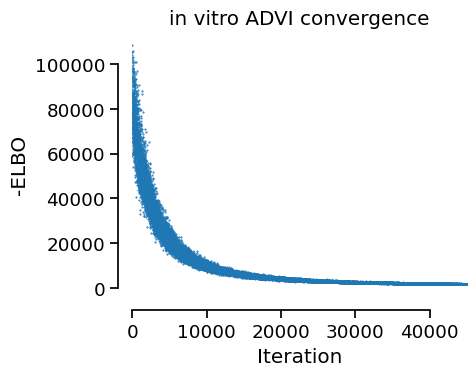

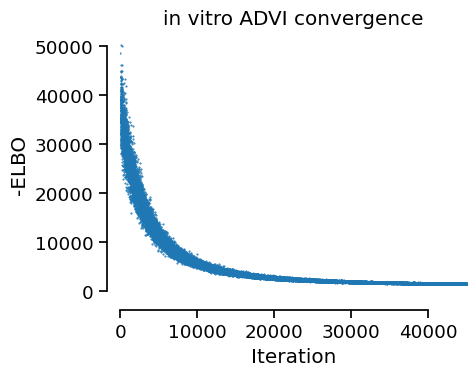

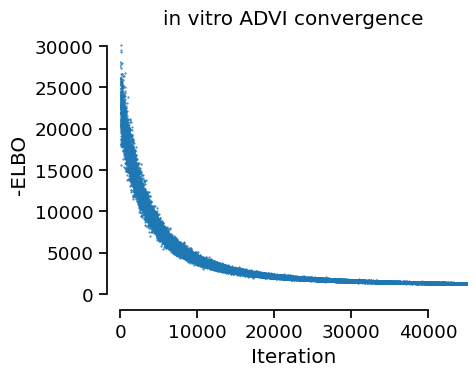

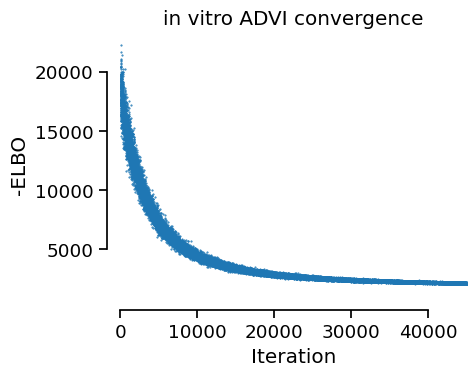

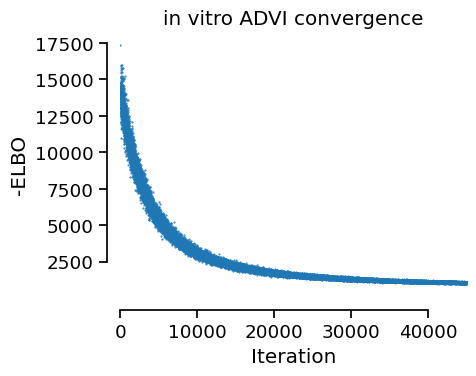

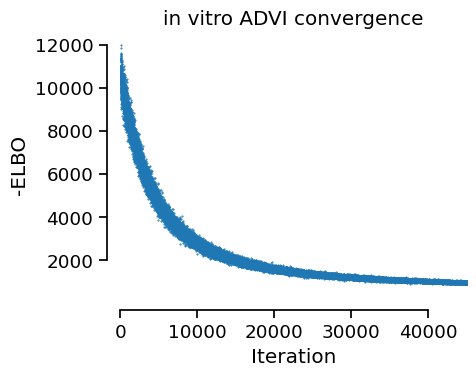

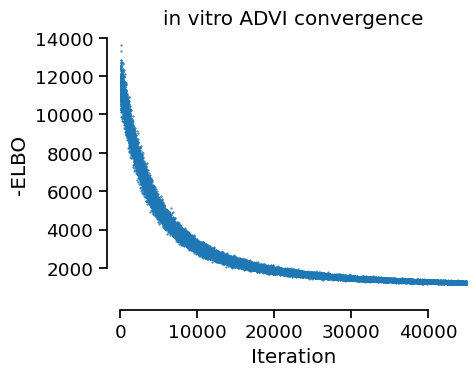

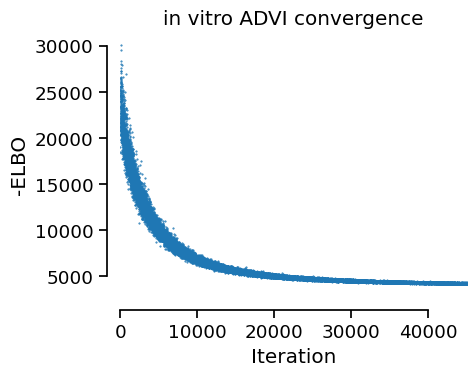

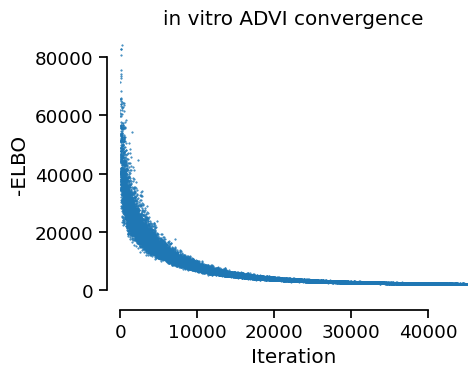

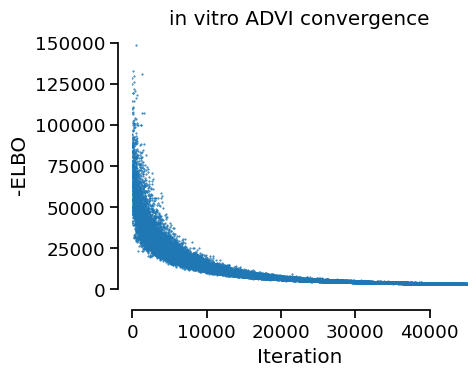

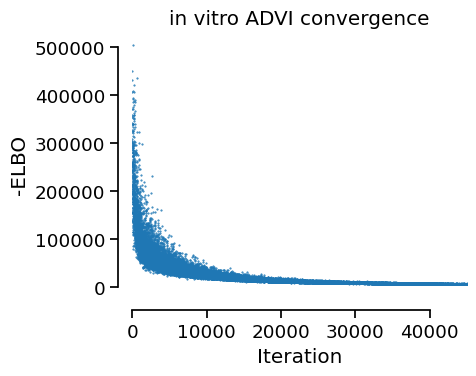

In [7]:
trace01 = run_ADVI(BMCA_obj01)
trace02 = run_ADVI(BMCA_obj02)
trace03 = run_ADVI(BMCA_obj03)
trace04 = run_ADVI(BMCA_obj04)
trace05 = run_ADVI(BMCA_obj05)
trace10 = run_ADVI(BMCA_obj10)
trace15 = run_ADVI(BMCA_obj15)
trace3 = run_ADVI(BMCA_obj3)
trace5 = run_ADVI(BMCA_obj5)
trace7 = run_ADVI(BMCA_obj7)
trace100 = run_ADVI(BMCA_obj100)

## Plotting ADVI results

In [8]:
def get_az_summary(t): 
    Ex_mean = az.summary(t)['mean'].reset_index()
    Ex_mean.columns = ['elasticity', 'mean']
    Ex_mean = Ex_mean[Ex_mean.elasticity.str.contains("Ex\[")]['mean'].values.flatten().reshape((-1,1))
    return np.mean(Ex_mean, axis=1)

In [9]:
Ex01_advi = get_az_summary(trace01)
Ex02_advi = get_az_summary(trace02)
Ex03_advi = get_az_summary(trace03)
Ex04_advi = get_az_summary(trace04)

Ex05_advi = get_az_summary(trace05)
Ex10_advi = get_az_summary(trace10)
Ex15_advi = get_az_summary(trace15)
Ex3_advi = get_az_summary(trace3)
Ex5_advi = get_az_summary(trace5)
Ex7_advi = get_az_summary(trace7)
Ex100_advi = get_az_summary(trace100)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [10]:
r.getScaledElasticityMatrix()

               G6P,      TRIO,       ACE,       P3G,       PEP,      GLCi,       F6P,       BPG,       PYR,      F16P,       P2G
vGLK   [[ -1.69458,         0,         0,         0,         0,    1.7051,         0,         0,         0,         0,         0],
vPGI    [  1.21084,         0,         0, -0.655794,         0,         0, -0.393974,         0,         0,         0,         0],
vGLYCO  [        1,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0],
vTreha  [        1,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0],
vPFK    [        0,         0,         0,         0,         0,         0,   1.06664,         0, -0.667279, -0.220572,         0],
vALD    [        0, -0.712931,         0,         0,         0,         0,         0,         0,         0,   1.29638,         0],
vGAPDH  [        0,   1.12721,         0,         0,         0,         0,         0,

## Calculating FCCs

In [11]:
gtFCC = pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), index=r.getReactionIds(), columns=r.getReactionIds())

In [12]:
def estimate_CCs(BMCA_obj, Ex):
    BMCA_obj.vn[BMCA_obj.vn == 0] = 1e-6
    
    a = np.diag(BMCA_obj.en.values / BMCA_obj.vn.values)
    a = np.diag(a)
    a = a[np.newaxis,:].repeat(1000, axis=0)

    Ex_ss = a @ Ex
    As = BMCA_obj.N @ np.diag(BMCA_obj.v_star) @ Ex_ss
    bs = BMCA_obj.N @ np.diag(BMCA_obj.v_star)
    bs = bs[np.newaxis, :].repeat(1000, axis=0)
    
    As = at.as_tensor_variable(As)
    bs = at.as_tensor_variable(bs)

    def solve_aesara(A, b):
        rsolve_op = LeastSquaresSolve()
        return rsolve_op(A, b).squeeze()

    CCC, _ = aesara.scan(lambda A, b: solve_aesara(A, b),
                        sequences=[As, bs], strict=True)

    identity = np.eye(len(BMCA_obj.N.T))
    identity = identity[np.newaxis,:].repeat(1000, axis=0)
    
    FCC = (Ex_ss @ CCC.eval()) + identity
    
    # return CCC.eval(), FCC
    return FCC


### Negative predictions

In [13]:
postFCC01 = estimate_CCs(BMCA_obj01, Ex01_advi.reshape((16,11)))
postFCC02 = estimate_CCs(BMCA_obj02, Ex02_advi.reshape((16,11)))
postFCC03 = estimate_CCs(BMCA_obj03, Ex03_advi.reshape((16,11)))
postFCC04 = estimate_CCs(BMCA_obj04, Ex04_advi.reshape((16,11)))

postFCC05 = estimate_CCs(BMCA_obj05, Ex05_advi.reshape((16,11)))
postFCC10 = estimate_CCs(BMCA_obj10, Ex10_advi.reshape((16,11)))
postFCC15 = estimate_CCs(BMCA_obj15, Ex15_advi.reshape((16,11)))
postFCC3 = estimate_CCs(BMCA_obj3, Ex3_advi.reshape((16,11)))
postFCC5 = estimate_CCs(BMCA_obj5, Ex5_advi.reshape((16,11)))
postFCC7 = estimate_CCs(BMCA_obj7, Ex7_advi.reshape((16,11)))
postFCC100 = estimate_CCs(BMCA_obj100, Ex100_advi.reshape((16,11)))

In [14]:
rxn_FCCs = [postFCC01, postFCC02, postFCC03, postFCC04, postFCC05, postFCC10, postFCC15, postFCC3, postFCC5, postFCC7, postFCC100]
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.01x', '1.5x', '3x', '5x', '7x', '10x']

In [15]:
def append_FCC_df(postFCC, label):
    dfs=[]
    
    for idx, rxn in enumerate(r.getReactionIds()):
        # negativity applied here
        df = -pd.DataFrame(postFCC[:,idx,:], columns=r.getReactionIds())
        df['pt_rxn']=[rxn]*len(df)
        dfs.append(df)
    
    w = pd.concat(dfs)
    w['pt_str']=[label]*len(w)
    return w

prd_FCCs = pd.concat([append_FCC_df(rxn_FCCs[i], pt_labels[i]) for i in range(len(rxn_FCCs))])

In [16]:
medPrdFCCs = pd.pivot_table(prd_FCCs, index=['pt_rxn','pt_str'], aggfunc='median', sort=False)
# medPrdFCCs.loc['vGLK']
medPrdFCCs.head()

vGLK      vPGI    vGLYCO    vTreha      vPFK      vALD  \
pt_rxn pt_str                                                               
vGLK   0.1x   -1.675591  1.053061  0.000909  0.138533 -0.272792 -0.024739   
vPGI   0.1x    0.993424  6.466199 -0.012168 -1.855158 -2.366001 -0.189840   
vGLYCO 0.1x   -0.030829 -0.334613 -0.999585  0.063257  0.140000  0.008300   
vTreha 0.1x    0.075749 -1.718972 -0.000741 -1.113014  0.509796  0.036984   
vPFK   0.1x    0.993424  8.466199 -0.012168 -1.855158 -4.366001 -0.189840   

                 vGAPDH      vPGK      vPGM      vENO      vPYK      vPDC  \
pt_rxn pt_str                                                               
vGLK   0.1x   -0.109102 -0.070067 -0.039076 -0.009837 -0.006724 -0.033309   
vPGI   0.1x   -0.878376 -0.561498 -0.298949 -0.070891 -0.041952 -0.269421   
vGLYCO 0.1x    0.034631  0.020625  0.011023  0.002514  0.000099  0.009723   
vTreha 0.1x    0.178559  0.113704  0.058090  0.012988  0.006448  0.054989   
vPFK   0.1x   -0.878376 -0.561498 -0.298949 -0.070891 -0.041952 -0.269421   

                   vSUC      vGLT      vADH    vG3PDH  
pt_rxn pt_str                                          
vGLK   0.1x   -0.006840  0.484178 -0.329004 -0.099600  
vPGI   0.1x   -0.054818  1.569889 -2.636774 -0.793665  
vGLYCO 0.1x    0.002071 -0.056575  0.099623  0.029735  
vTreha 0.1x    0.011101  0.080406  0.533974  0.159940  
vPFK   0.1x   -0.054818  1.569889 -2.636774 -0.793665

### Graphing the averaged differences between ground truth and predicted distributions

C:\Users\user\AppData\Local\Temp\ipykernel_24240\2305547668.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



"\n    f2 = plt.figure(figsize=(16, 10))\n    relDifs.T.plot(kind='bar')\n    # alternate color each group of reactions so it is easier to see\n    for i in range(8):\n            plt.axvspan(2*i + 0.5, 2*i + 1.5, alpha=0.1)\n    plt.axhline(0, c='gray')\n    plt.ylim((-10,10))\n    plt.legend(loc='lower right')\n    plt.title(f'ADVI predictions for {rxn} FCCs given all data--relDifs')\n"

<Figure size 1600x1000 with 0 Axes>

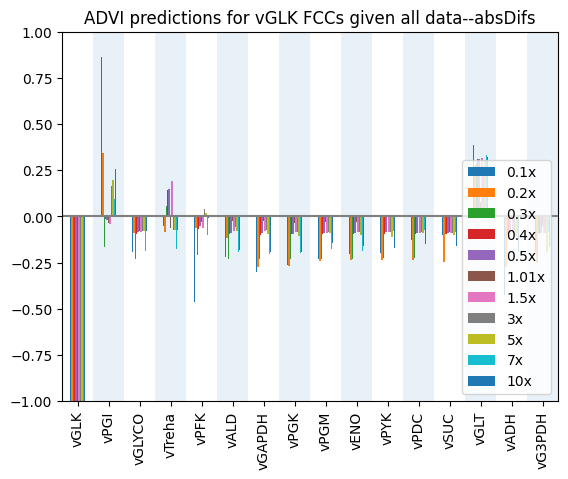

<Figure size 1600x1000 with 0 Axes>

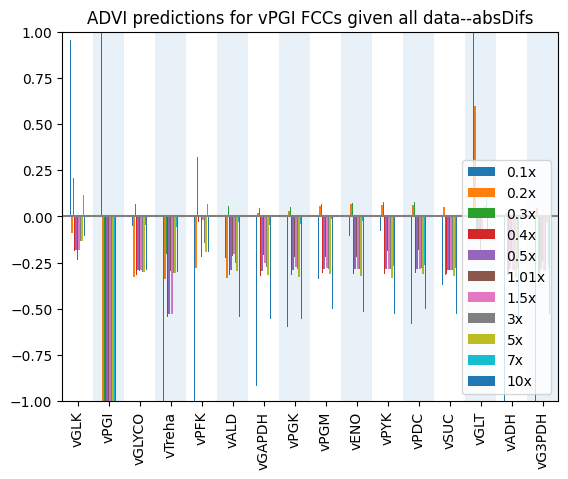

<Figure size 1600x1000 with 0 Axes>

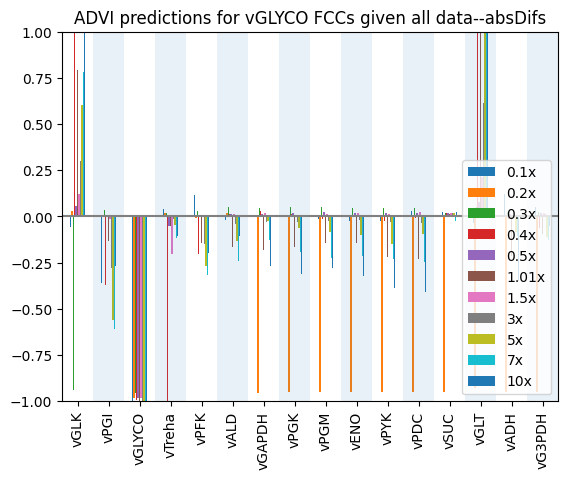

<Figure size 1600x1000 with 0 Axes>

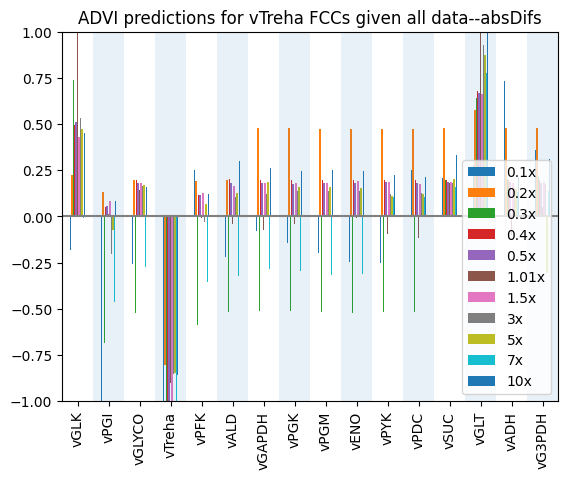

<Figure size 1600x1000 with 0 Axes>

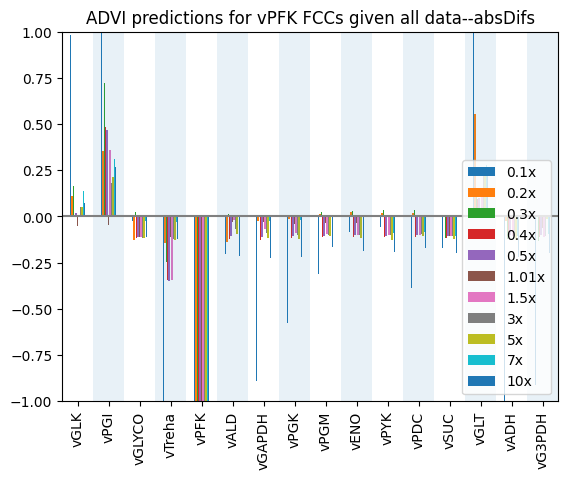

<Figure size 1600x1000 with 0 Axes>

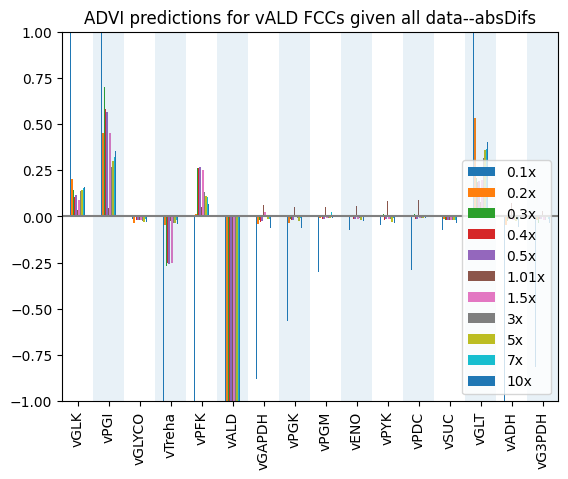

<Figure size 1600x1000 with 0 Axes>

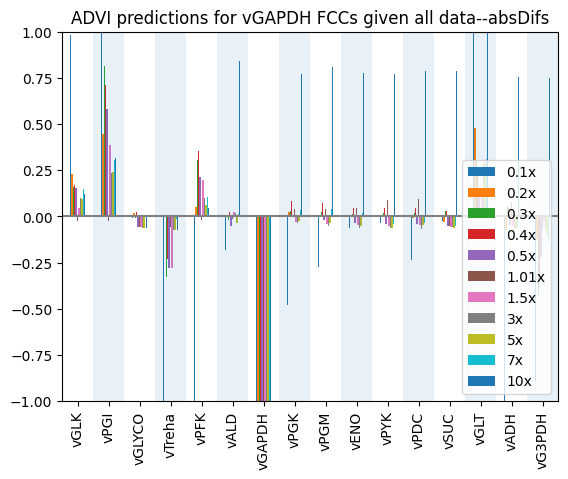

<Figure size 1600x1000 with 0 Axes>

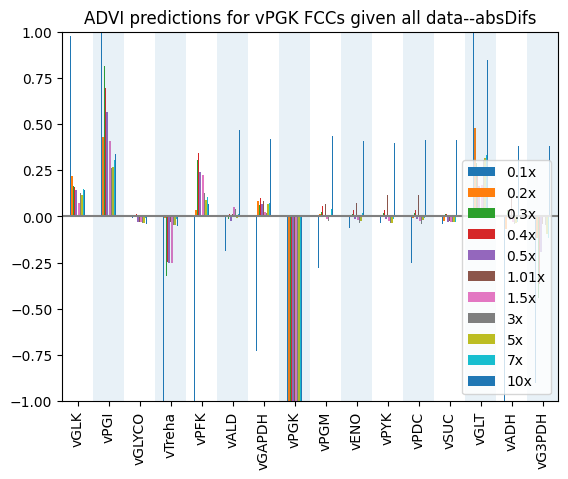

<Figure size 1600x1000 with 0 Axes>

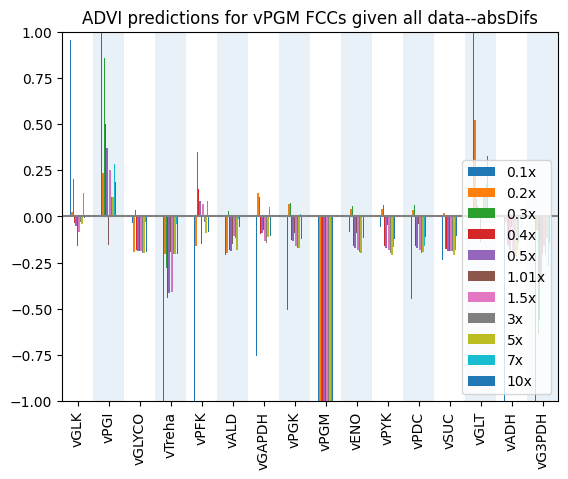

<Figure size 1600x1000 with 0 Axes>

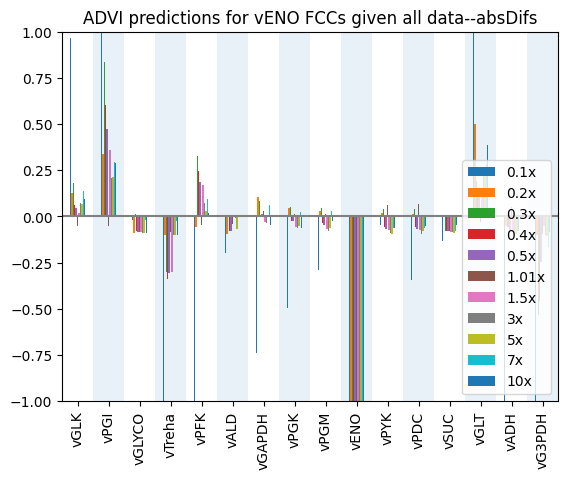

<Figure size 1600x1000 with 0 Axes>

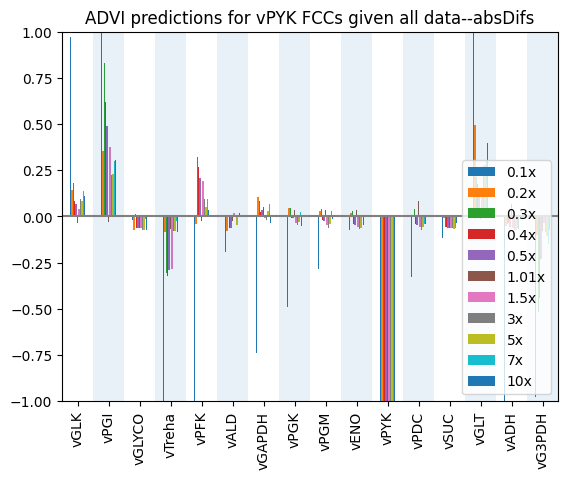

<Figure size 1600x1000 with 0 Axes>

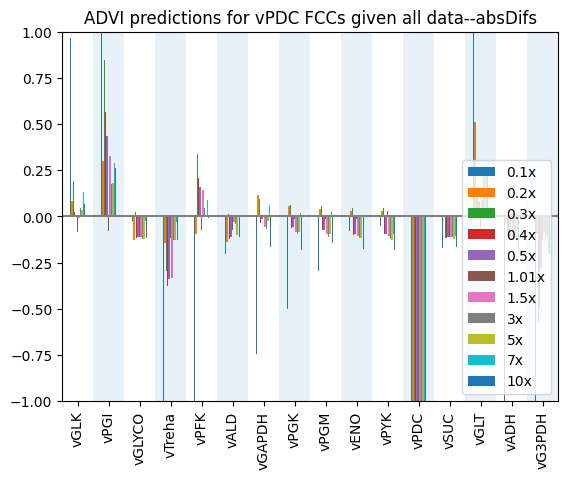

<Figure size 1600x1000 with 0 Axes>

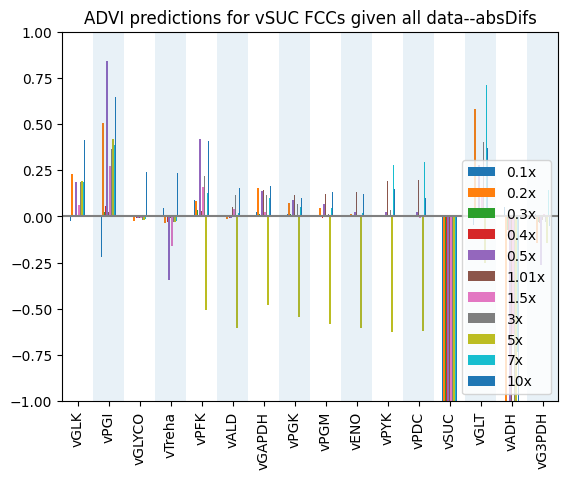

<Figure size 1600x1000 with 0 Axes>

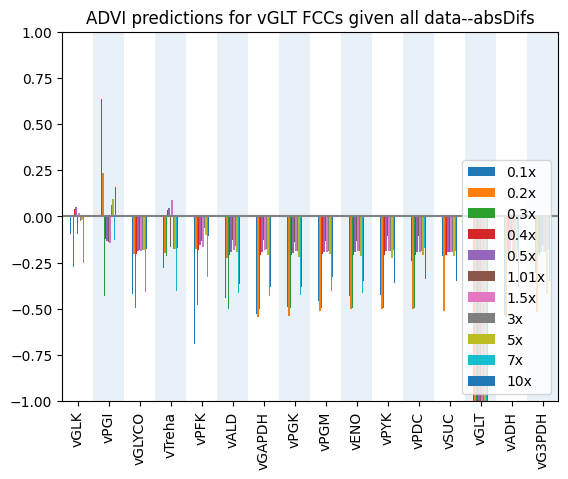

<Figure size 1600x1000 with 0 Axes>

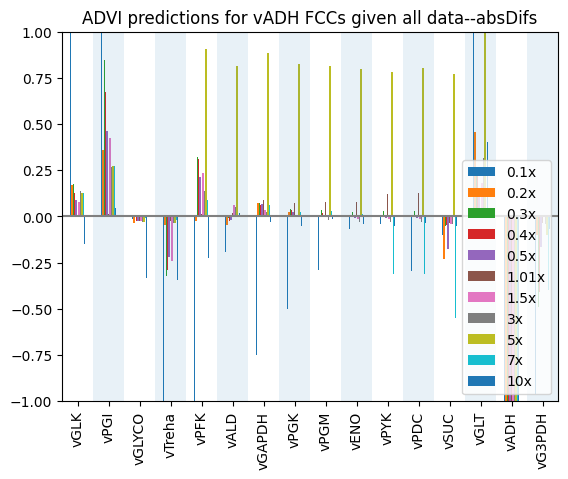

<Figure size 1600x1000 with 0 Axes>

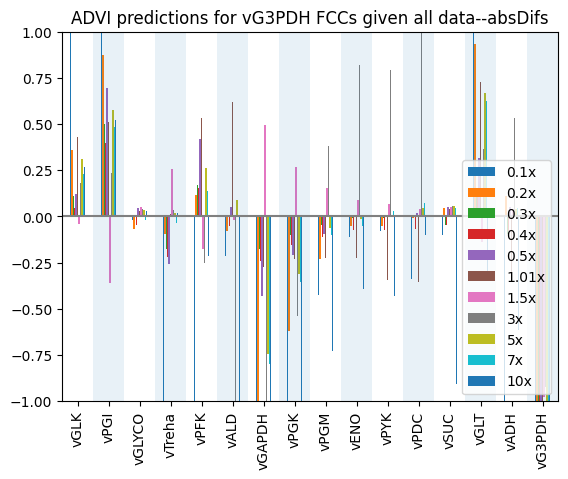

In [17]:
# for each reaction that can be perturbed
for rxn in r.getReactionIds():
    # locate the applicable rows in the medPrdFCCs df
    a = medPrdFCCs.loc[rxn]
    gtvals = np.repeat(gtFCC[rxn].values, repeats=len(pt_labels), axis=0).reshape((len(pt_labels), -1))
    # calculate the absolute difference...
    absDifs = a - gtvals
    # and the relative difference
    relDifs = absDifs/gtvals
    
    # plot both graphs 
    f1 = plt.figure(figsize=(16, 10))
    absDifs.T.plot(kind='bar')
    # alternate color each group of reactions so it is easier to see
    for i in range(8):
            plt.axvspan(2*i + 0.5, 2*i + 1.5, alpha=0.1)
    plt.axhline(0, c='gray')
    plt.ylim((-1,1))
    plt.legend(loc='lower right')
    plt.title(f'ADVI predictions for {rxn} FCCs given all data--absDifs')
"""
    f2 = plt.figure(figsize=(16, 10))
    relDifs.T.plot(kind='bar')
    # alternate color each group of reactions so it is easier to see
    for i in range(8):
            plt.axvspan(2*i + 0.5, 2*i + 1.5, alpha=0.1)
    plt.axhline(0, c='gray')
    plt.ylim((-10,10))
    plt.legend(loc='lower right')
    plt.title(f'ADVI predictions for {rxn} FCCs given all data--relDifs')
"""

In [18]:
plt.close("all")

## Evaluating FCC ranking

In [19]:
## ground truth FCC rankings for vADH

gtFCC=pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
m1 = gtFCC.index.values[:, None] == gtFCC.columns.values
gtFCC = pd.DataFrame(np.select([m1], [float('Nan')], gtFCC), columns=gtFCC.columns, index=gtFCC.index)
gtFCC_rankings= gtFCC.rank(axis=1, ascending=False, na_option='keep')

a = gtFCC_rankings.loc['vADH']

### via Spearman rank coefficients

In [20]:
def calculate_FCC_med_rankings(postFCC, reaction='vADH'):
    postFCC_med=pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
    m1 = postFCC_med.index.values[:, None] == postFCC_med.columns.values
    postFCC = pd.DataFrame(np.select([m1], [float('Nan')], postFCC_med), columns=postFCC_med.columns, index=postFCC_med.index)
    postFCC_rankings= postFCC.rank(axis=1, ascending=False, na_option='keep')
    
    return postFCC_rankings.loc[reaction]
    

In [21]:
spearman_coefficients = []
b_list = []
for FCC in rxn_FCCs:
    b = calculate_FCC_med_rankings(FCC)
    b_list.append(b)
    spearman_coefficients.append(stats.spearmanr(a.dropna().values, b.dropna().values))

In [22]:
spearman_coefficients

[SignificanceResult(statistic=0.4678571428571427, pvalue=0.0786302311543806),
 SignificanceResult(statistic=0.37499999999999994, pvalue=0.16843274984674558),
 SignificanceResult(statistic=0.47142857142857136, pvalue=0.07607042915033121),
 SignificanceResult(statistic=0.4642857142857142, pvalue=0.08125098075549496),
 SignificanceResult(statistic=0.6535714285714285, pvalue=0.008230371463638973),
 SignificanceResult(statistic=0.007142857142857141, pvalue=0.9798442277615982),
 SignificanceResult(statistic=0.39642857142857135, pvalue=0.1434945314423536),
 SignificanceResult(statistic=0.23928571428571427, pvalue=0.3903793119202358),
 SignificanceResult(statistic=0.32499999999999996, pvalue=0.23722543823723408),
 SignificanceResult(statistic=0.6392857142857141, pvalue=0.010288446619594207),
 SignificanceResult(statistic=0.38214285714285706, pvalue=0.1598236299869673)]

(0.0, 1.05)

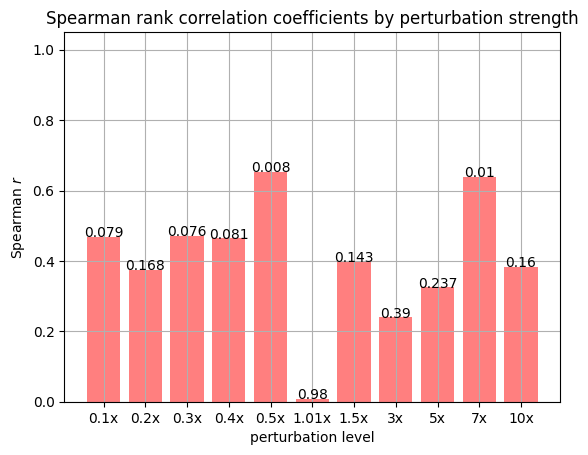

In [23]:
plt.bar(pt_labels, [i[0] for i in spearman_coefficients], alpha=0.5, color='r')
plt.grid()

for i, txt in enumerate([i[1].round(3) for i in spearman_coefficients]):
    plt.annotate(txt, (pt_labels[i], [i[0] for i in spearman_coefficients][i]), ha='center')

plt.title("Spearman rank correlation coefficients by perturbation strength")
plt.xlabel('perturbation level')
plt.ylabel('Spearman $\it{r}$')
plt.ylim((0, 1.05))

### evaluating top five rankings

In [25]:
ranked_b_list = [b.sort_values().reset_index().set_index('vADH') for b in b_list]
q = pd.concat(ranked_b_list, axis=1)
q['gt'] = a.sort_values().reset_index().set_index('vADH')
q.columns = pt_labels + ['gt']
q = q[['gt'] + pt_labels]
q

gt    0.1x    0.2x    0.3x    0.4x    0.5x   1.01x    1.5x      3x  \
vADH                                                                           
1.0     vPGI    vPGI    vGLT    vPGI    vPGI    vPGI    vPDC    vPGI    vGLT   
2.0     vSUC    vPFK    vPGI  vG3PDH  vG3PDH    vPFK    vPYK    vPFK    vPGI   
3.0     vGLT  vTreha    vSUC  vTreha    vPFK  vTreha  vGAPDH  vTreha    vGLK   
4.0     vPGM    vGLT    vGLK    vPFK  vTreha    vGLT    vENO    vGLT    vPFK   
5.0   vTreha    vGLK  vG3PDH    vGLT    vGLT    vSUC    vPGM    vGLK    vALD   
6.0     vPDC  vG3PDH  vGAPDH    vGLK    vGLK  vG3PDH    vPGK    vALD  vGAPDH   
7.0     vPFK  vGAPDH  vTreha  vGAPDH  vGAPDH    vGLK    vGLT  vGAPDH  vG3PDH   
8.0     vGLK    vPGK    vALD    vPGK    vPGK  vGAPDH    vALD  vG3PDH    vSUC   
9.0     vENO    vPGM    vPGK    vPGM    vPGM    vPGK    vPFK    vPGK    vPGK   
10.0    vPYK    vPDC  vGLYCO    vSUC    vSUC    vPGM    vPGI    vSUC  vTreha   
11.0  vGAPDH    vALD    vPGM    vPDC    vPDC    vENO    vGLK    vPGM    vPDC   
12.0  vG3PDH    vSUC    vPFK    vPYK    vPYK    vPYK    vSUC    vENO    vPYK   
13.0    vPGK    vENO    vPDC    vENO    vENO    vPDC  vG3PDH    vPDC  vGLYCO   
14.0    vALD    vPYK    vENO    vALD    vALD    vALD  vTreha    vPYK    vENO   
15.0  vGLYCO  vGLYCO    vPYK  vGLYCO  vGLYCO  vGLYCO  vGLYCO  vGLYCO    vPGM   
NaN     vADH    vADH    vADH    vADH    vADH    vADH    vADH    vADH    vADH   

          5x      7x     10x  
vADH                          
1.0     vGLT    vGLT    vGLT  
2.0     vPGI    vPGI    vPGI  
3.0     vGLK    vSUC    vGLK  
4.0     vPFK    vGLK    vPFK  
5.0   vGAPDH    vPFK    vALD  
6.0   vG3PDH  vG3PDH  vG3PDH  
7.0     vPGK  vGAPDH  vTreha  
8.0     vPGM    vPGM    vPYK  
9.0     vALD    vPGK    vSUC  
10.0    vSUC    vENO    vPGM  
11.0  vTreha  vTreha    vPGK  
12.0    vPDC    vPYK    vENO  
13.0  vGLYCO    vPDC  vGLYCO  
14.0    vENO  vGLYCO    vPDC  
15.0    vPYK    vALD  vGAPDH  
NaN     vADH    vADH    vADH

In [26]:
q.to_csv('simplTeusink_reg2_rankings.csv')